# Heaps and Zipf Law

#### by Niloufar Babaahmadi (610398103)

In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy import stats

First we need to read every file in folder and start analyzing our data.

In [2]:
def inpt(path):
    
    #print('here')
    #n = 0
    
    for root, dirs, files in os.walk(path):
        for file in files:
            filename, extension = os.path.splitext(file)
            if extension == '.txt':
                #n += 1
                #print(file)
                address = path + file
                data = open(address, 'r')
                analyze(data)
                
    #print(n)
                

In order to work with literal words we need to get rid of any special symbols and numbers and also for not considering a word twice, all words have to switch into either lowercase or uppercase.

In [3]:
def editor(line):
    
    #print("here1")
    bad_chars = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789" #chars to delete
        
    #print(line)
    line = line.lower() #lowercase all the words
    #print(line)

    for chars in bad_chars:

        line = line.replace(chars, '')
        #print(line)
    
    return line

There are three fundemental reasons for analyzing each file: 
Firstly, to create a dictionary of the words and their frequency. 
Secondly, to keep count of all the words we have seen so far.
and lastly, to keep count of all the words unique to each file.

In [4]:
def analyze(data):
    
    global dictionary
    global full_count
    
    fcount = 0 #counts the overal words used
    ucount = 0 #counts the unique words to this file
    
    for line in data:
        
        line = editor(line) #pre process the line to avoid mistakes
    
        words = line.split() 

        for word in words:

            fcount += 1

            if word not in dictionary: #if the current word doesnt exist in the dictionary then add it

                dictionary[word] = 1
                ucount += 1
                #print(dictionary)

            else: #if it already exists increment the value 

                dictionary[word] += 1  
                #print(dictionary)
     
    l = len(full_count)
    
    if l != 0: #if we aren't on the first file, we need to add 
                #the words of the current files to the previous 
                #ones (words seen so far)
        
        fcount += full_count[l-1]
        ucount += unique_count[l-1]
    
    full_count.append(fcount)
    unique_count.append(ucount)

### Heap 

the words seen so far and the unique words seen so far needs to create the x and Y for drawing the heaps plot.

In [5]:
def heap():

    x = np.log10(full_count) 
    Y = np.log10(unique_count)

    #plotting our data
    plt.plot(x, Y)

    #predicting Y
    slope, intercept, r, p, std_err = stats.linregress(x, Y)
    
    print("Y_pred = "+ str(slope) + " X + "+ str(intercept))
    
    y_pred = []
    
    for x1 in x:
        
        y_pred.append(slope*x1 + intercept)

    lines = plt.plot(x, Y, x, y_pred)
    l1, l2 = lines 
    #plotting the predicted valyes
    plt.setp(l1, linestyle='-', linewidth=2, color='c')  
    plt.setp(l2, linestyle='--', linewidth=1, color='k')  
    plt.show()
    
    

### zipf

ranks and frequencies will create the x and y for the plot.

In [6]:
def zipf():
    
    x = []
    Y = []
    #getting ranks for x axis
    for i in range(1, len(dictionary)+1):
        x.append(i)
    #getting frequencies for Y axis   
    values = dictionary.values()
    Y = list(values)
    
    x = np.log10(x)  
    Y = np.log10(Y)
    #plotting our data
    plt.plot(x, Y)
    
    #predicting y
    slope, intercept, r, p, std_err = stats.linregress(x, Y)
    print("Y_pred = "+ str(slope) + " X + "+ str(intercept))
    
    y_pred = []
    
    for x1 in x:
        
        y_pred.append(slope*x1 + intercept)
    
    #plotting the predicted values
    lines = plt.plot(x, Y, x, y_pred)
    l1, l2 = lines      
    plt.setp(l1, linestyle='-', linewidth=2, color='c')  
    plt.setp(l2, linestyle='--', linewidth=1, color='k')  
    plt.show()

And finally everything is put together in this section:

heap:
Y_pred = 0.6947022872131392 X + 0.632164023241236


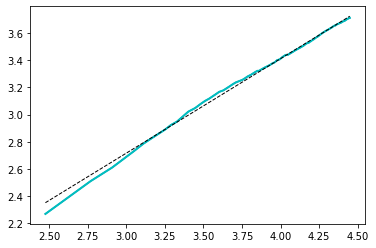

zipf:
Y_pred = -0.959979772490498 X + 3.4561819056216776


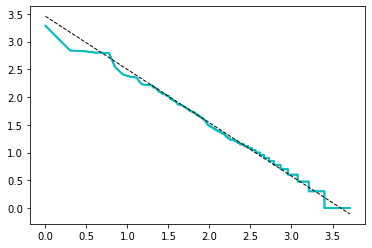

heap:
Y_pred = 0.7138270042706979 X + 0.5608805117477078


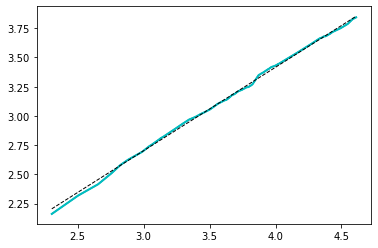

zipf:
Y_pred = -0.9981125761752597 X + 3.7170777781768405


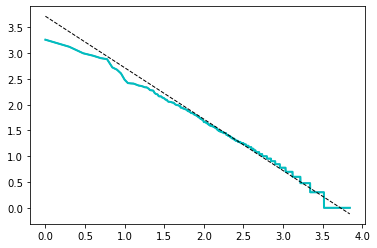

In [7]:
global dictionary
global full_count
global unique_count

dictionary = {} #stores words of all the files and their frequency
full_count = [] #counts all of the words of each file
unique_count = [] #counts the unique words each file adds to the dictionary

#you can change entertainment to medical and get different results
inpt("entertainment/")

print("heap:")
heap()

dictionary= dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))

print("zipf:")
zipf()

#################################

dictionary = {}
full_count = [] 
unique_count = [] 

inpt("medical/")

print("heap:")
heap()

dictionary= dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))

print("zipf:")
zipf()

#print(dictionary)
#print(full_count)
#print(unique_count)